# Try to re-create the simple perceptron algorithm from lecture 1 of the course "Learning from Data"

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from numpy import random
%matplotlib inline

In [2]:
def drawplot(X,Y,polynomial):    
    x_axis = np.linspace(-1, 1)
    y_axis = polynomial(x_axis)
    plt.clf()
    plt.scatter(X[:,0], X[:,1],c=Y, cmap=plt.cm.Set1,edgecolor='k' )
    plt.plot(x_axis, y_axis,color="red")
    plt.ylim(-1.2,1.2)
    plt.xlim(-1.2,1.2)

In [18]:
def caly(X, polynomial):
    Y = np.zeros(len(X))
    #now make any x1 above the line is 1, below is 0
    for index,a in enumerate(X):
        y = polynomial(a[0])
        if a[1] > y:
            Y[index] = 1
        else:
            Y[index] = -1
    return Y


In [19]:
def cal_error(predict, actual):
    count = 0
    for i in range(len(predict)):
        if predict[i] != actual[i]:
            count += 1
    return count/len(predict)

real coef [10.04717953 -3.26924421]


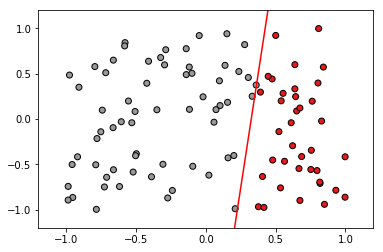

In [64]:
#draw the real plot
inputs = np.random.uniform(-1,1,size=(100,2))
lineY = np.random.uniform(-1,1,size=(2,2))
coef = np.polyfit(lineY[:,0], lineY[:,1],1)
print('real coef', coef)
poly = np.poly1d(coef)
outputs = caly(inputs, poly)
drawplot(inputs,outputs, poly)

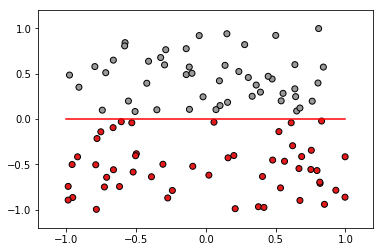

In [65]:
#start learning
w = np.array([0,0]) #init weight to 0, w is also the first poly
#now the function has the form x2 = w1*x1 + w0
#let draw the init plot before any learning
predict_y = caly(inputs, np.poly1d(w))
drawplot(inputs,predict_y,np.poly1d(w))    



In [68]:
w = np.array([0,0]) #init weight to 0, w is also the first poly
init_y = caly(inputs, np.poly1d(w))
lowest_error = cal_error(init_y, outputs)
print(init_error)
#iterate thought the missclasified point and adjust the weight by this formular w <- w + y*x (y is the sign)
for e in range(500):
    for index, p in enumerate(predict_y):
        if p != outputs[index]:
#             updated_value = -outputs[index]*inputs[index]
            updated_value = np.random.choice([1,-1]) * inputs[index]
            new_w = w + updated_value
            new_w = new_w / np.linalg.norm(new_w)
            pred_y = caly(inputs, np.poly1d(new_w))
            error = cal_error(pred_y, outputs) 
            if error < lowest_error:
                w = new_w
                lowest_error = error
                print('new error', error)            
    predict_y = caly(inputs, np.poly1d(w))


0.3
new error 0.37
new error 0.34
new error 0.33
new error 0.19
new error 0.16


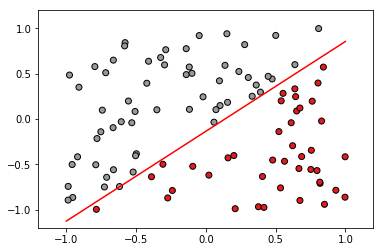

In [69]:
drawplot(inputs,caly(inputs, np.poly1d(w)), np.poly1d(w))